In [1]:
from vampyr import vampyr3d as vp
import numpy as np
from scf_solver import scf_solver
from starting_guess import starting_guess

import numpy.linalg as LA


mra = vp.MultiResolutionAnalysis(order=7, box=[-16, 16])
epsilon = 1.0e-4
be = [[4, [0.0, 0.0, 0.0]]]



In [4]:
Phi_n = starting_guess(mra, epsilon, 2, [0.0,0.0,0.0])
fock_n = np.array([[-1.0, 0.0], [0.0, -0.5]]) # Startig guess

In [5]:
updates, energies, Phi_n = scf_solver(Phi_n, fock_n, be, mra, epsilon)

[[-1.   0. ]
 [ 0.  -0.5]]
[[-3.70577872  0.        ]
 [ 0.         -0.14052104]]
[[-4.59455902  0.        ]
 [ 0.         -0.30882647]]
[[-4.74665276  0.        ]
 [ 0.         -0.30911719]]
[[-4.75432944  0.        ]
 [ 0.         -0.30889382]]


KeyboardInterrupt: 

In [5]:
import pandas as pd
energies_df = pd.DataFrame(energies)

In [6]:
energies_df = energies_df.diff(axis=0)

In [7]:
energies_df = energies_df.dropna()
energies_df = energies_df.abs()

In [8]:
energies_df.head()

,$\sum_i \epsilon_i$,$E_{coul}$,$E_{en}$,$E_{ex}$,$E_{kin}$,$E_{tot}$
1,2.114171,0.192219,3.140535,0.162528,1.735856,1.759425
2,0.304769,0.427725,3.122306,0.223814,2.409714,0.508681
3,0.014907,0.228362,1.658689,0.119460,1.425978,0.123809
4,0.021603,0.096759,0.731876,0.051750,0.663461,0.023406
5,0.012654,0.036681,0.293065,0.020192,0.272740,0.003836


Text(0, 0.5, 'Energy error')

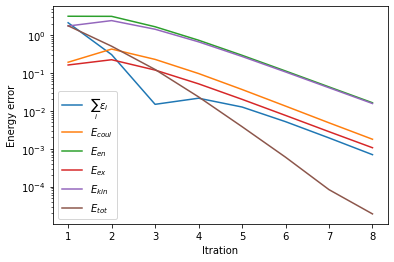

In [9]:
import matplotlib.pyplot as plt
#energies_df.loc[:, "couloumb_energy":"total_energy"].plot(logy=True)
energies_df.plot(logy=True)
plt.xlabel("Itration")
plt.ylabel("Energy error")

In [10]:
updates_df = pd.DataFrame(updates)
updates_df["norm"] = updates_df.apply(lambda x : np.sqrt(x[0]**2 + x[1]**2), axis=1)

Text(0.5, 0, 'Iteration')

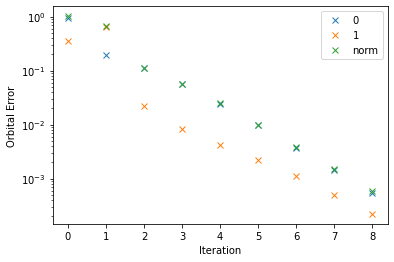

In [18]:
updates_df.plot(logy=True, style="x")
plt.ylabel("Orbital Error")
plt.xlabel("Iteration")